## Multiple Qubits and Entangled States
---


```

|a> = a_00 |00> + a_01 |01> + a_10 |10> + a_11 |11>
Rules of measurement work the same way -> p(|00>) =  |<00|a>|^2 = |a_00| ^ 2


|ba> = |b> (*) |a> = [b0.a0, b0.a1, b1.a0, b1.a1]T
Where (*) is the Kronecker Product
```

In [2]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
print("Process Complete!")

Process Complete!


In [2]:
qc = QuantumCircuit(3)
for q in range(3):
    qc.h(q)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [3]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()
print(final_state) # (1/root(8)) [1, 1, 1, 1, 1, 1, 1, 1]

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


```
|0>|1> = [0, 1, 0, 0]T
|0>|+> = [1/root(2), 1/root(2), 0, 0]T
|+>|1> = [0, 1/root(2), 0, 1/root(2)]T
|->|+> = (1/2)[1, 1, -1, -1]T

Write |psi> = (1/root(2)) |00> + (i/root(2)) |01>
Assume two qubits (a1|0> + b1|1>) (*) (a2|0> + b2|1>) = a1a2|00> + a1b2|01> + b1a2|10> + b1b2|11>
Therefore, b1 = 0, a1 = 1, a2 = 1/root(2), b2 = i/root(2)

=> |psi> = |0> (*) ((1/root(2))|0> + (i/root(2))|1))

Can be done directly as well,
|psi> = (1/root(2)) |00> + (i/root(2)) |01> = (1/root(2)) |0>(*)|0> + (i/root(2)) |0>(*)|1>
      = |0> (*) ((1/root(2))|0> + (i/root(2))|1))
```

### Single Qubit Gates on Multi Qubit Systems

```
Applying H on q0 and X on q1 -
X|q0> (*) H|q1> = (X (*) H) |q0q1>

For applying a single gate on say, qubit 1
Apply (I (*) X) on |q0q1>

Note that q0 is the bottommost, and q1 is the topmost qubit (qiskit notation)
```

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [6]:
# Single qubit unitary U for U = XZH
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)

sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

### CNOT in Qiskit

```
|psi> = a_00 |00> + a_01 |01> + a_10 |10> + a_11 |11>

Note how it is different from what is seen before-
CNOT from other sources = [1 0 0 0]
                          [0 1 0 0]
                          [0 0 0 1]
                          [0 0 1 0]
For |q0q1>, |q0> is control, |q0> is the control qubit and |q1> is the target qubit

Swaps a_10 and a_11


CNOT in qiskit = [1 0 0 0]
                 [0 0 0 1]
                 [0 0 1 0]
                 [0 1 0 0]
                 
Swaps a_01 and a_11
For |q0q1>, |q1> is the control qubit and |q0> is the target qubit
Basically, in qiskit, if we have a circuit

----------- |q1>

----------- |q0>

This system is |q0>(*)|q1> = |q0q1>,
which is why CNOT's representation is different


Summary -
In literature, CNOT |+0> = (1/root(2))[1, 0, 0, 1]T
In qiskit,     CNOT |0+> = (1/root(2))[1, 0, 0, 1]T

```

In [7]:
qc = QuantumCircuit(2)
qc.cx(0, 1)

sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [3]:
# Creating an entangled state
# |psi> = (1/root(2)) [1, 0, 0, 1]T

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [4]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
res = sim.run(qobj).result()
final_state = res.get_statevector()
array_to_latex(final_state, prefix="\\text{Entangled State = }\n")

<IPython.core.display.Latex object>

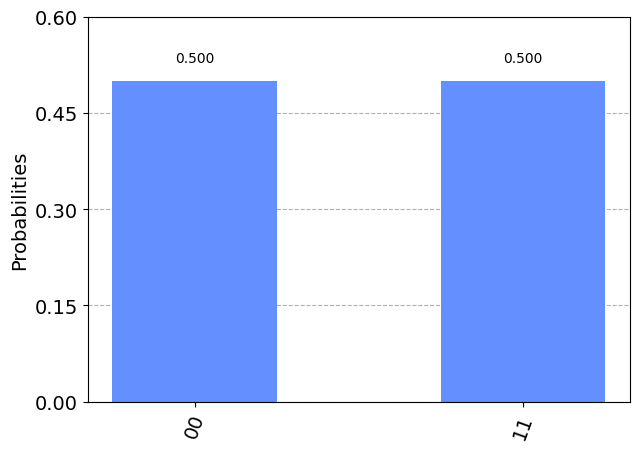

In [5]:
plot_histogram(res.get_counts())
# 50% chance of it collapsing to |00> and 50% chance of it collapsing to |11>

```
Measuring one qubit has an immediate effect on the other ('spooky action at a distance')

No Communication Theorem -
The measurement's result is random (we cannot use the shared quantum states to communicate)
```

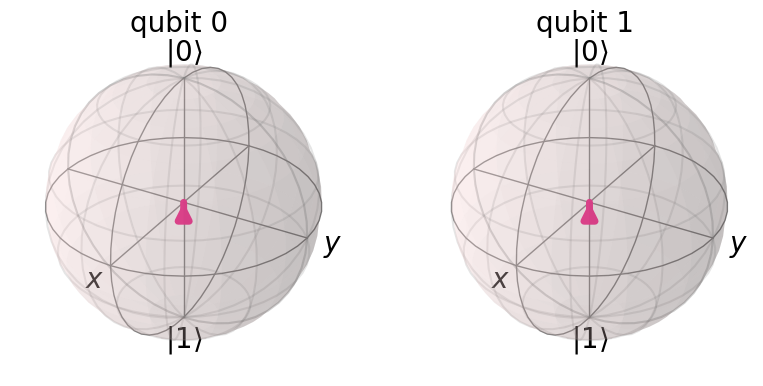

In [6]:
plot_bloch_multivector(final_state)

```
There is no measurement basis about which a specific measurement is guaranteed
We cannot visualize this statevector using a Bloch Sphere
We can use a QSphere for this
```

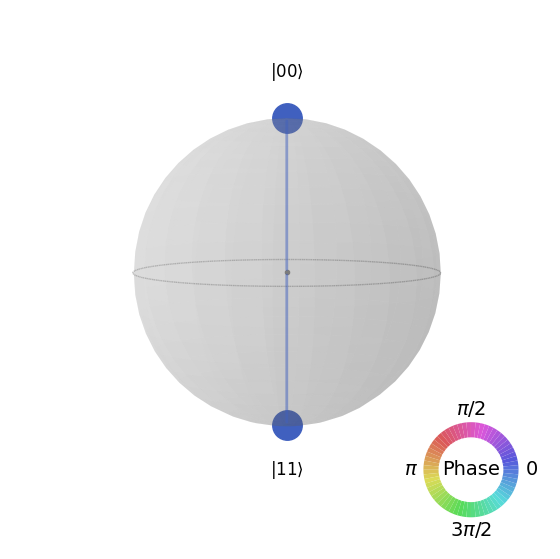

In [7]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


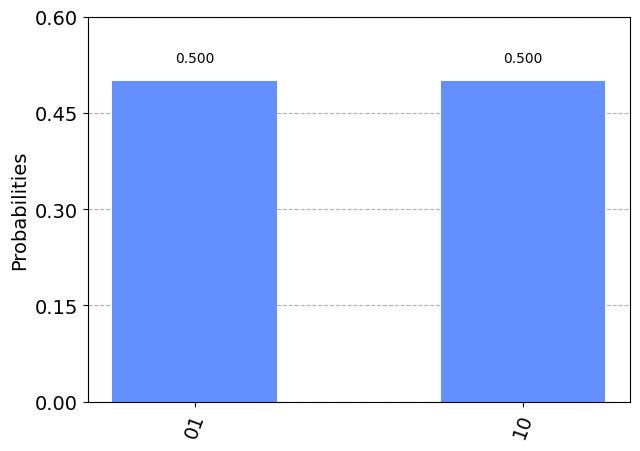

In [11]:
# Creating an entangled state
# |psi> = (1/root(2)) [0, 1, 1, 0]T

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
res = sim.run(qobj).result()
final_state = res.get_statevector()
print(final_state)

plot_histogram(res.get_counts())

```
Calculating the unitary transformation that takes |00> straight to (1/root(2)) [0, 1, 1, 0]T
Using Qiskit Notation,
CNOT (X (*) H) = (1/root(2)) [1 0 0 0] * ([0 1] (*) [1  1])
                             [0 0 0 1]    [1 0]     [1 -1]
                             [0 0 1 0]
                             [0 1 0 0]
               
               = (1/root(2)) [0  0  1  1]
                             [1 -1  0  0]
                             [1  1  0  0]
                             [0  0  1 -1]
                          

*   = Matrix Multiplication
(*) = Tensor Product
```

In [12]:
# Verifying the above result with qiskit
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)

sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>